# FINAL TASK_DATA SCIENTIST ID/X PARTNERS

Antonius Andi Syah Putra Halawa

## Credit Risk Prediction

Data Science Workﬂow
* Business Understanding
* Analytic Approach
* Data Requirements
* Data Collection
* Data Understanding
* Data Preparation
* Exploratory Data Analysis
* Model Building
* Model Evaluation
* Model Deployment

## Business Understanding

Credit Risk adalah kemungkinan bahwa peminjam tidak akan membayar kembali pinjaman mereka kepada pemberi pinjaman. Maka dilakukan manajemen Credit Risk dan membangun model yang dapat memprediksi credit risk data pinjaman yang diterima dan yang ditolak, sehingga menyediakan solusi teknologi bagi lending company tersebut.

* Bagaimana membangun model yang dapat memprediksi credit risk data pinjaman yang diterima dan yang ditolak yang memiliki credit  risk tinggi atau rendah.
* Bagaimana ukuran risiko kredit peminjam.
* Rumus yang menggunakan elemen data atau variabel untuk menentukan skor kredit peminjam.

## Analytic Approach

* Predictive Model; Supervised Learning

## Data Requirements

* Lending Company

## Data Understanding

In [260]:
# Import the Libraries and Packages

import pandas as pd             # To work with dataset
import numpy as np              # math library
import matplotlib.pyplot as plt # to plot some parameters in seaborn
import seaborn as sns           # Graph library that use matplot in background
import xgboost as xgb
import sklearn
import warnings # ignores any warning
warnings.filterwarnings("ignore")

# import Scikit-learn library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.stats import iqr



# Scikit-learn models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# XGBoost
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score

In [261]:
# Load the data 

df = pd.read_csv('loan_data_2007_2014.csv') 

In [91]:
# Get an overview of the data
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
# Viewing the last n lines
df.tail()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN
466284,466284,9199665,11061576,10000,10000,9975.0,36 months,19.20,367.58,D,...,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,NaN,NaN


In [93]:
# Check the shape of the data
df.shape

(466285, 75)

In [94]:
# Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [95]:
# Looking the Describe of Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01


In [96]:
# missing values (NaNs)
df.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

In [97]:
# percentage of missing values
df.isnull().sum()*100/len(df)

Unnamed: 0            0.000000
id                    0.000000
member_id             0.000000
loan_amnt             0.000000
funded_amnt           0.000000
                       ...    
all_util            100.000000
total_rev_hi_lim     15.071469
inq_fi              100.000000
total_cu_tl         100.000000
inq_last_12m        100.000000
Length: 75, dtype: float64

## Data Preparation

### Clean the data

In [262]:
# Remove unnecessary columns
df = df.drop(['Unnamed: 0','policy_code','id'],axis=1)
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [263]:
# Drop Columns with NaN Values
df = df.dropna(how='all',axis=1)
df

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,...,171.62,NaN,Jan-16,0.0,NaN,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,...,119.66,NaN,Sep-13,0.0,NaN,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,...,649.91,NaN,Jan-16,0.0,NaN,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,357.48,NaN,Jan-15,0.0,NaN,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,...,67.79,Feb-16,Jan-16,0.0,NaN,INDIVIDUAL,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,...,432.64,Feb-16,Jan-16,0.0,NaN,INDIVIDUAL,0.0,0.0,294998.0,29900.0
466281,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),...,17.50,NaN,Jan-16,0.0,NaN,INDIVIDUAL,0.0,0.0,221830.0,39400.0
466282,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,...,514.34,Feb-16,Dec-15,0.0,NaN,INDIVIDUAL,0.0,0.0,73598.0,13100.0
466283,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,...,1500.68,NaN,Apr-15,0.0,NaN,INDIVIDUAL,0.0,0.0,591610.0,53100.0


In [264]:
# Fill null values (Nan and None)
df.fillna(0,inplace=True)
df

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,0,...,171.62,0,Jan-16,0.0,0.0,INDIVIDUAL,0.0,0.0,0.0,0.0
1,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,...,119.66,0,Sep-13,0.0,0.0,INDIVIDUAL,0.0,0.0,0.0,0.0
2,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,0,...,649.91,0,Jan-16,0.0,0.0,INDIVIDUAL,0.0,0.0,0.0,0.0
3,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,357.48,0,Jan-15,0.0,0.0,INDIVIDUAL,0.0,0.0,0.0,0.0
4,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,...,67.79,Feb-16,Jan-16,0.0,0.0,INDIVIDUAL,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,...,432.64,Feb-16,Jan-16,0.0,0.0,INDIVIDUAL,0.0,0.0,294998.0,29900.0
466281,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),...,17.50,0,Jan-16,0.0,0.0,INDIVIDUAL,0.0,0.0,221830.0,39400.0
466282,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,...,514.34,Feb-16,Dec-15,0.0,0.0,INDIVIDUAL,0.0,0.0,73598.0,13100.0
466283,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,...,1500.68,0,Apr-15,0.0,0.0,INDIVIDUAL,0.0,0.0,591610.0,53100.0


In [265]:
# remove missing values
df.dropna(inplace=True)
df

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,0,...,171.62,0,Jan-16,0.0,0.0,INDIVIDUAL,0.0,0.0,0.0,0.0
1,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,...,119.66,0,Sep-13,0.0,0.0,INDIVIDUAL,0.0,0.0,0.0,0.0
2,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,0,...,649.91,0,Jan-16,0.0,0.0,INDIVIDUAL,0.0,0.0,0.0,0.0
3,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,357.48,0,Jan-15,0.0,0.0,INDIVIDUAL,0.0,0.0,0.0,0.0
4,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,...,67.79,Feb-16,Jan-16,0.0,0.0,INDIVIDUAL,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,...,432.64,Feb-16,Jan-16,0.0,0.0,INDIVIDUAL,0.0,0.0,294998.0,29900.0
466281,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),...,17.50,0,Jan-16,0.0,0.0,INDIVIDUAL,0.0,0.0,221830.0,39400.0
466282,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,...,514.34,Feb-16,Dec-15,0.0,0.0,INDIVIDUAL,0.0,0.0,73598.0,13100.0
466283,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,...,1500.68,0,Apr-15,0.0,0.0,INDIVIDUAL,0.0,0.0,591610.0,53100.0


In [102]:
# Check the nans are replaced 
df.isnull().sum()*100/len(df)

member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      0.0
emp_length                     0.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                           0.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_delinq         0.0
mths_since_last_reco

### Explore the data

In [103]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466285.0,7.327675e+04,5.496375e+04,0.00,4.500000e+04,6.300000e+04,8.895300e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01
delinq_2yrs,466285.0,2.846607e-01,7.973435e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,2.900000e+01
inq_last_6mths,466285.0,8.046946e-01,1.091583e+00,0.00,0.000000e+00,0.000000e+00,1.000000e+00,3.300000e+01


In [104]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    466285 non-null  int64  
 1   loan_amnt                    466285 non-null  int64  
 2   funded_amnt                  466285 non-null  int64  
 3   funded_amnt_inv              466285 non-null  float64
 4   term                         466285 non-null  object 
 5   int_rate                     466285 non-null  float64
 6   installment                  466285 non-null  float64
 7   grade                        466285 non-null  object 
 8   sub_grade                    466285 non-null  object 
 9   emp_title                    466285 non-null  object 
 10  emp_length                   466285 non-null  object 
 11  home_ownership               466285 non-null  object 
 12  annual_inc                   466285 non-null  float64
 13 

In [266]:
# Looking distribution of a target label "loan_status"

loan_status_count = df[['member_id','loan_status']].groupby(['loan_status']).size().reset_index(name = 'count')
total_loans = loan_status_count['count'].sum()
loan_status_count['percentage(%)'] = ((loan_status_count['count'] / total_loans)*100).astype('float')

print(loan_status_count)


                                         loan_status   count  percentage(%)
0                                        Charged Off   42475       9.109236
1                                            Current  224226      48.087757
2                                            Default     832       0.178432
3  Does not meet the credit policy. Status:Charge...     761       0.163205
4  Does not meet the credit policy. Status:Fully ...    1988       0.426349
5                                         Fully Paid  184739      39.619332
6                                    In Grace Period    3146       0.674695
7                                  Late (16-30 days)    1218       0.261214
8                                 Late (31-120 days)    6900       1.479782


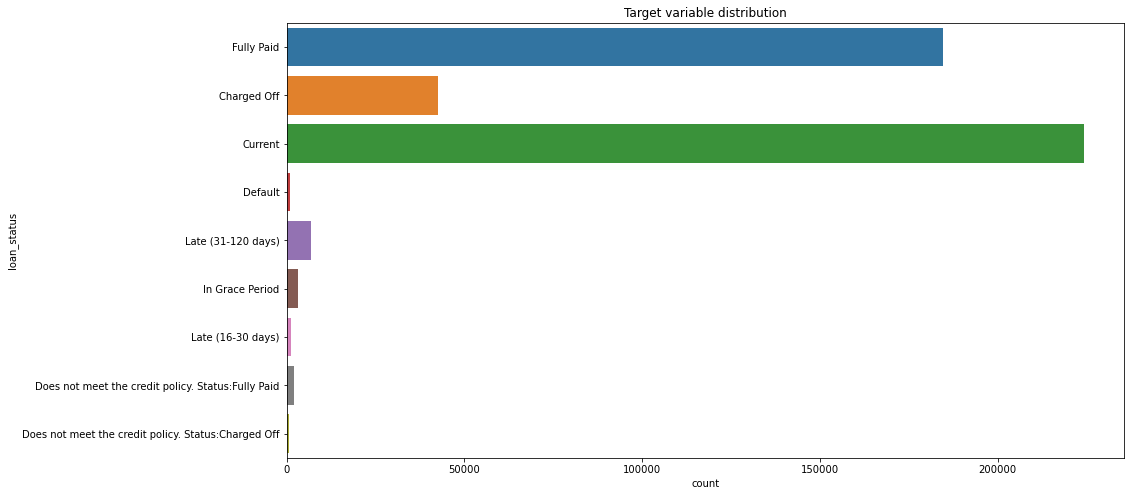

In [267]:
# visualization of a target label "loan_status"
plt.figure(figsize=(15, 8))
sns.countplot(data=df, y='loan_status')
plt.xlabel('count')
plt.ylabel('loan_status')
plt.title("Target variable distribution")
plt.show()

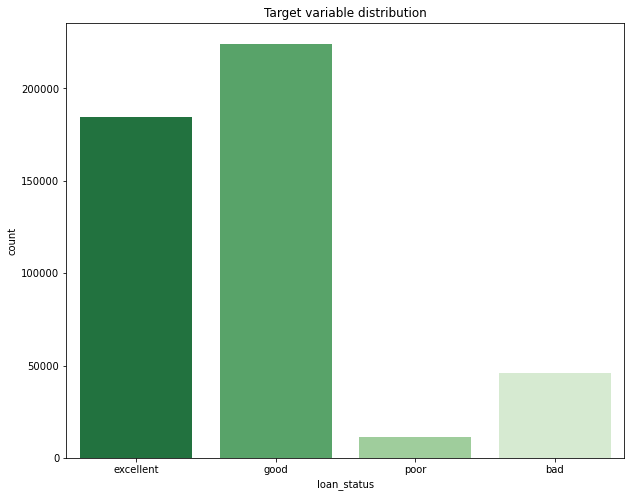

In [268]:
# Changing category column names of "loan_status"

df['loan_status'] = df['loan_status'].replace(
    {'Fully Paid':'excellent',
    'Current':'good',
    'Charged Off': 'bad',
    'Default':'bad',
    'In Grace Period':'poor',
    'Late (16-30 days)':'poor',
    'Late (31-120 days)':'poor',
    'Does not meet the credit policy. Status:Charged Off':'bad',
    'Does not meet the credit policy. Status:Fully Paid':'bad'})

plt.figure(figsize=(10, 8))
sns.countplot(x='loan_status',data=df, palette='Greens_r',order=['excellent','good','poor','bad'])
plt.title('Target variable distribution')
plt.show()

Text(0.5, 1.0, 'loan_status vs grade')

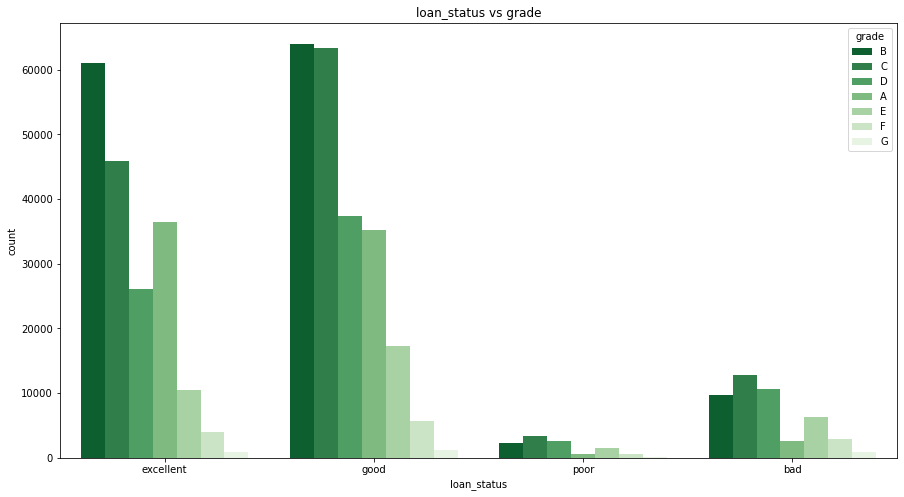

In [235]:
# loan_status vs grade
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='loan_status',order=['excellent','good','poor','bad'],palette='Greens_r', 
            hue='grade',hue_order = df['grade'].value_counts().index.values)
plt.title('loan_status vs grade')

Text(0.5, 1.0, 'loan_status vs verified_status_joint')

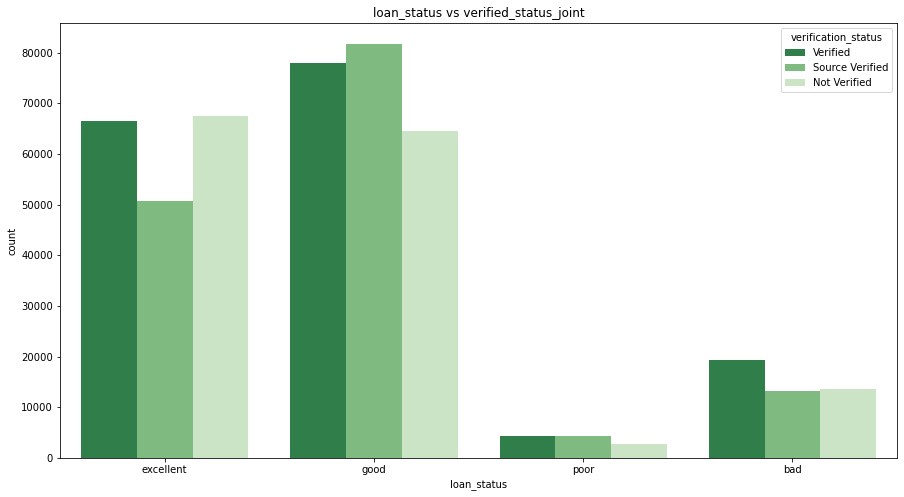

In [109]:
# loan_status vs verified_status_joint
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='loan_status',order=['excellent','good','poor','bad'],palette='Greens_r', 
            hue='verification_status', 
            hue_order = df['verification_status'].value_counts().index.values)
plt.title('loan_status vs verified_status_joint')

Text(0.5, 1.0, 'loan_status vs purpose')

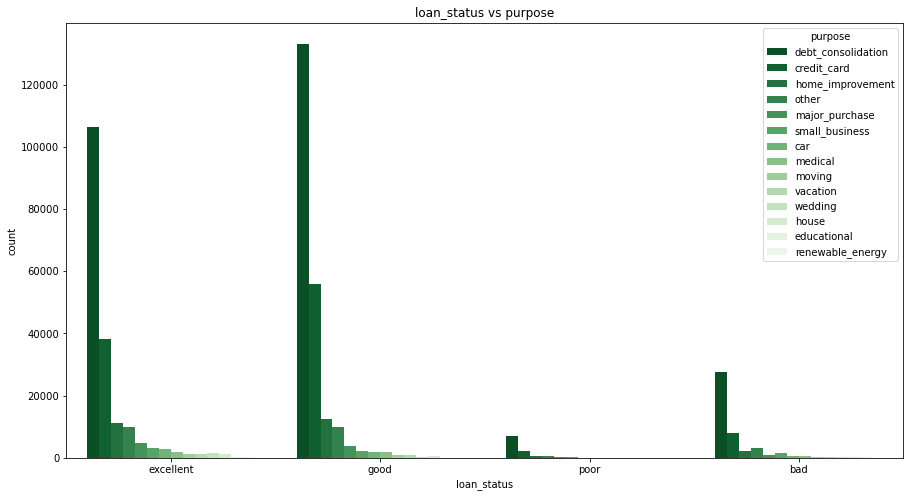

In [110]:
# loan_status vs purpose
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='loan_status',order=['excellent','good','poor','bad'],palette='Greens_r', 
            hue='purpose', 
            hue_order = df['purpose'].value_counts().index.values)
plt.title("loan_status vs purpose")

Text(0.5, 1.0, 'loan_status vs home_ownership')

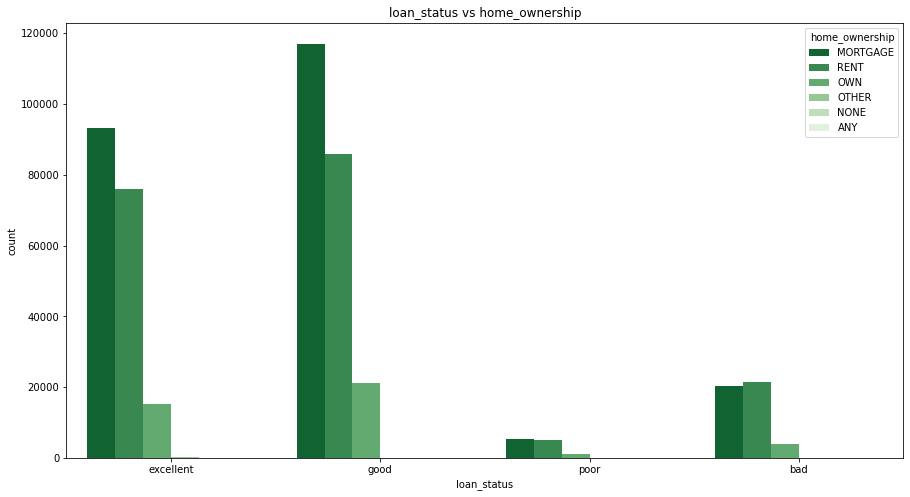

In [111]:
# loan_status vs home_ownership
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='loan_status',order=['excellent','good','poor','bad'],palette='Greens_r', 
            hue='home_ownership', 
            hue_order = df['home_ownership'].value_counts().index.values)
plt.title("loan_status vs home_ownership")

Text(0.5, 1.0, 'loan_status vs emp_length')

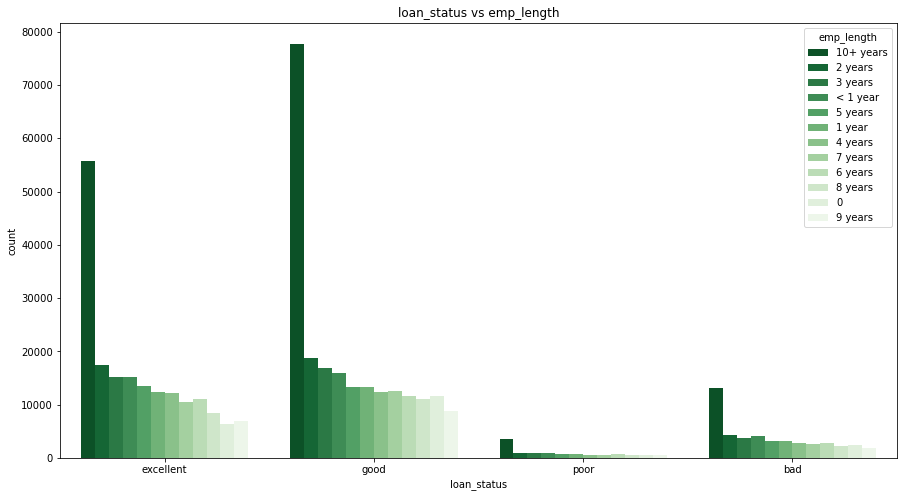

In [112]:
# loan_status vs emp_length
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='loan_status',order=['excellent','good','poor','bad'],palette='Greens_r', 
            hue='emp_length', 
            hue_order = df['emp_length'].value_counts().index.values)
plt.title("loan_status vs emp_length")

Text(0.5, 1.0, 'purpose')

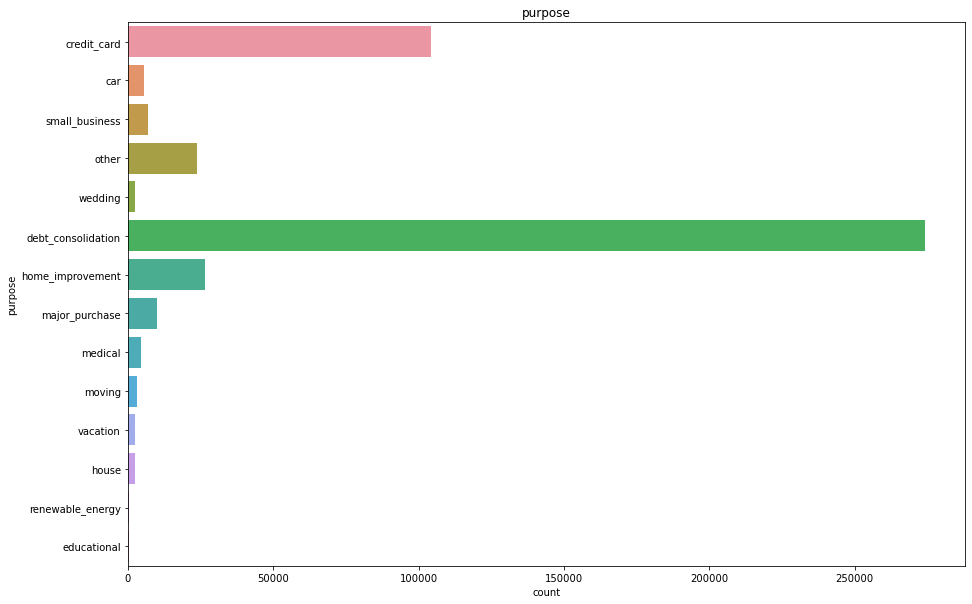

In [113]:
# purpose
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='purpose')
plt.xlabel('count')
plt.ylabel('purpose')
plt.title("purpose")

### Correlation of data

In [236]:
# Correlation Analysis
corr_matrix = df.corr()
corr_matrix

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
member_id,1.000000,0.070210,0.073942,0.083196,-0.028278,0.042639,0.024934,0.129867,0.072560,-0.086320,...,-0.043115,-0.066358,-0.030748,-0.076851,0.056790,0.151854,0.026984,0.006049,0.168950,0.166744
loan_amnt,0.070210,1.000000,0.998548,0.994347,0.167183,0.949666,0.370899,0.057319,0.006869,-0.020269,...,0.043650,0.110691,0.077336,0.304243,-0.008039,-0.052052,0.006288,-0.002024,0.330107,0.292122
funded_amnt,0.073942,0.998548,1.000000,0.996125,0.167921,0.951787,0.370317,0.058673,0.007414,-0.020910,...,0.043350,0.110338,0.077190,0.304178,-0.007794,-0.050742,0.006476,-0.001989,0.333025,0.294751
funded_amnt_inv,0.083196,0.994347,0.996125,1.000000,0.169353,0.947387,0.367815,0.062606,0.008178,-0.027503,...,0.038985,0.107944,0.073781,0.303105,-0.007131,-0.047118,0.006806,-0.001890,0.337985,0.299242
int_rate,-0.028278,0.167183,0.167921,0.169353,1.000000,0.148790,-0.046055,0.159657,0.079209,0.205677,...,0.057875,0.127893,0.082198,0.075609,0.020319,0.087577,0.030341,0.001416,-0.044509,-0.093074
installment,0.042639,0.949666,0.951787,0.947387,0.148790,1.000000,0.368152,0.049919,0.017028,0.002305,...,0.052341,0.105666,0.075344,0.299867,-0.006028,-0.040335,0.008927,-0.001522,0.304369,0.276347
annual_inc,0.024934,0.370899,0.370317,0.367815,-0.046055,0.368152,1.000000,-0.188521,0.058898,0.056681,...,0.020274,0.016955,0.013681,0.142160,-0.000444,0.004081,0.017133,0.001908,0.430935,0.265121
dti,0.129867,0.057319,0.058673,0.062606,0.159657,0.049919,-0.188521,1.000000,-0.003667,-0.012485,...,-0.005747,0.021462,0.018084,-0.043068,0.000335,-0.010719,0.009494,-0.002506,0.035464,0.100296
delinq_2yrs,0.072560,0.006869,0.007414,0.008178,0.079209,0.017028,0.058898,-0.003667,1.000000,0.018001,...,0.024388,0.004479,0.005364,-0.013728,0.039132,0.061889,0.126533,0.000427,0.089490,-0.011037
inq_last_6mths,-0.086320,-0.020269,-0.020910,-0.027503,0.205677,0.002305,0.056681,-0.012485,0.018001,1.000000,...,0.029926,0.042931,0.032671,0.041252,-0.001825,0.043673,-0.006915,0.001323,0.028150,-0.012437


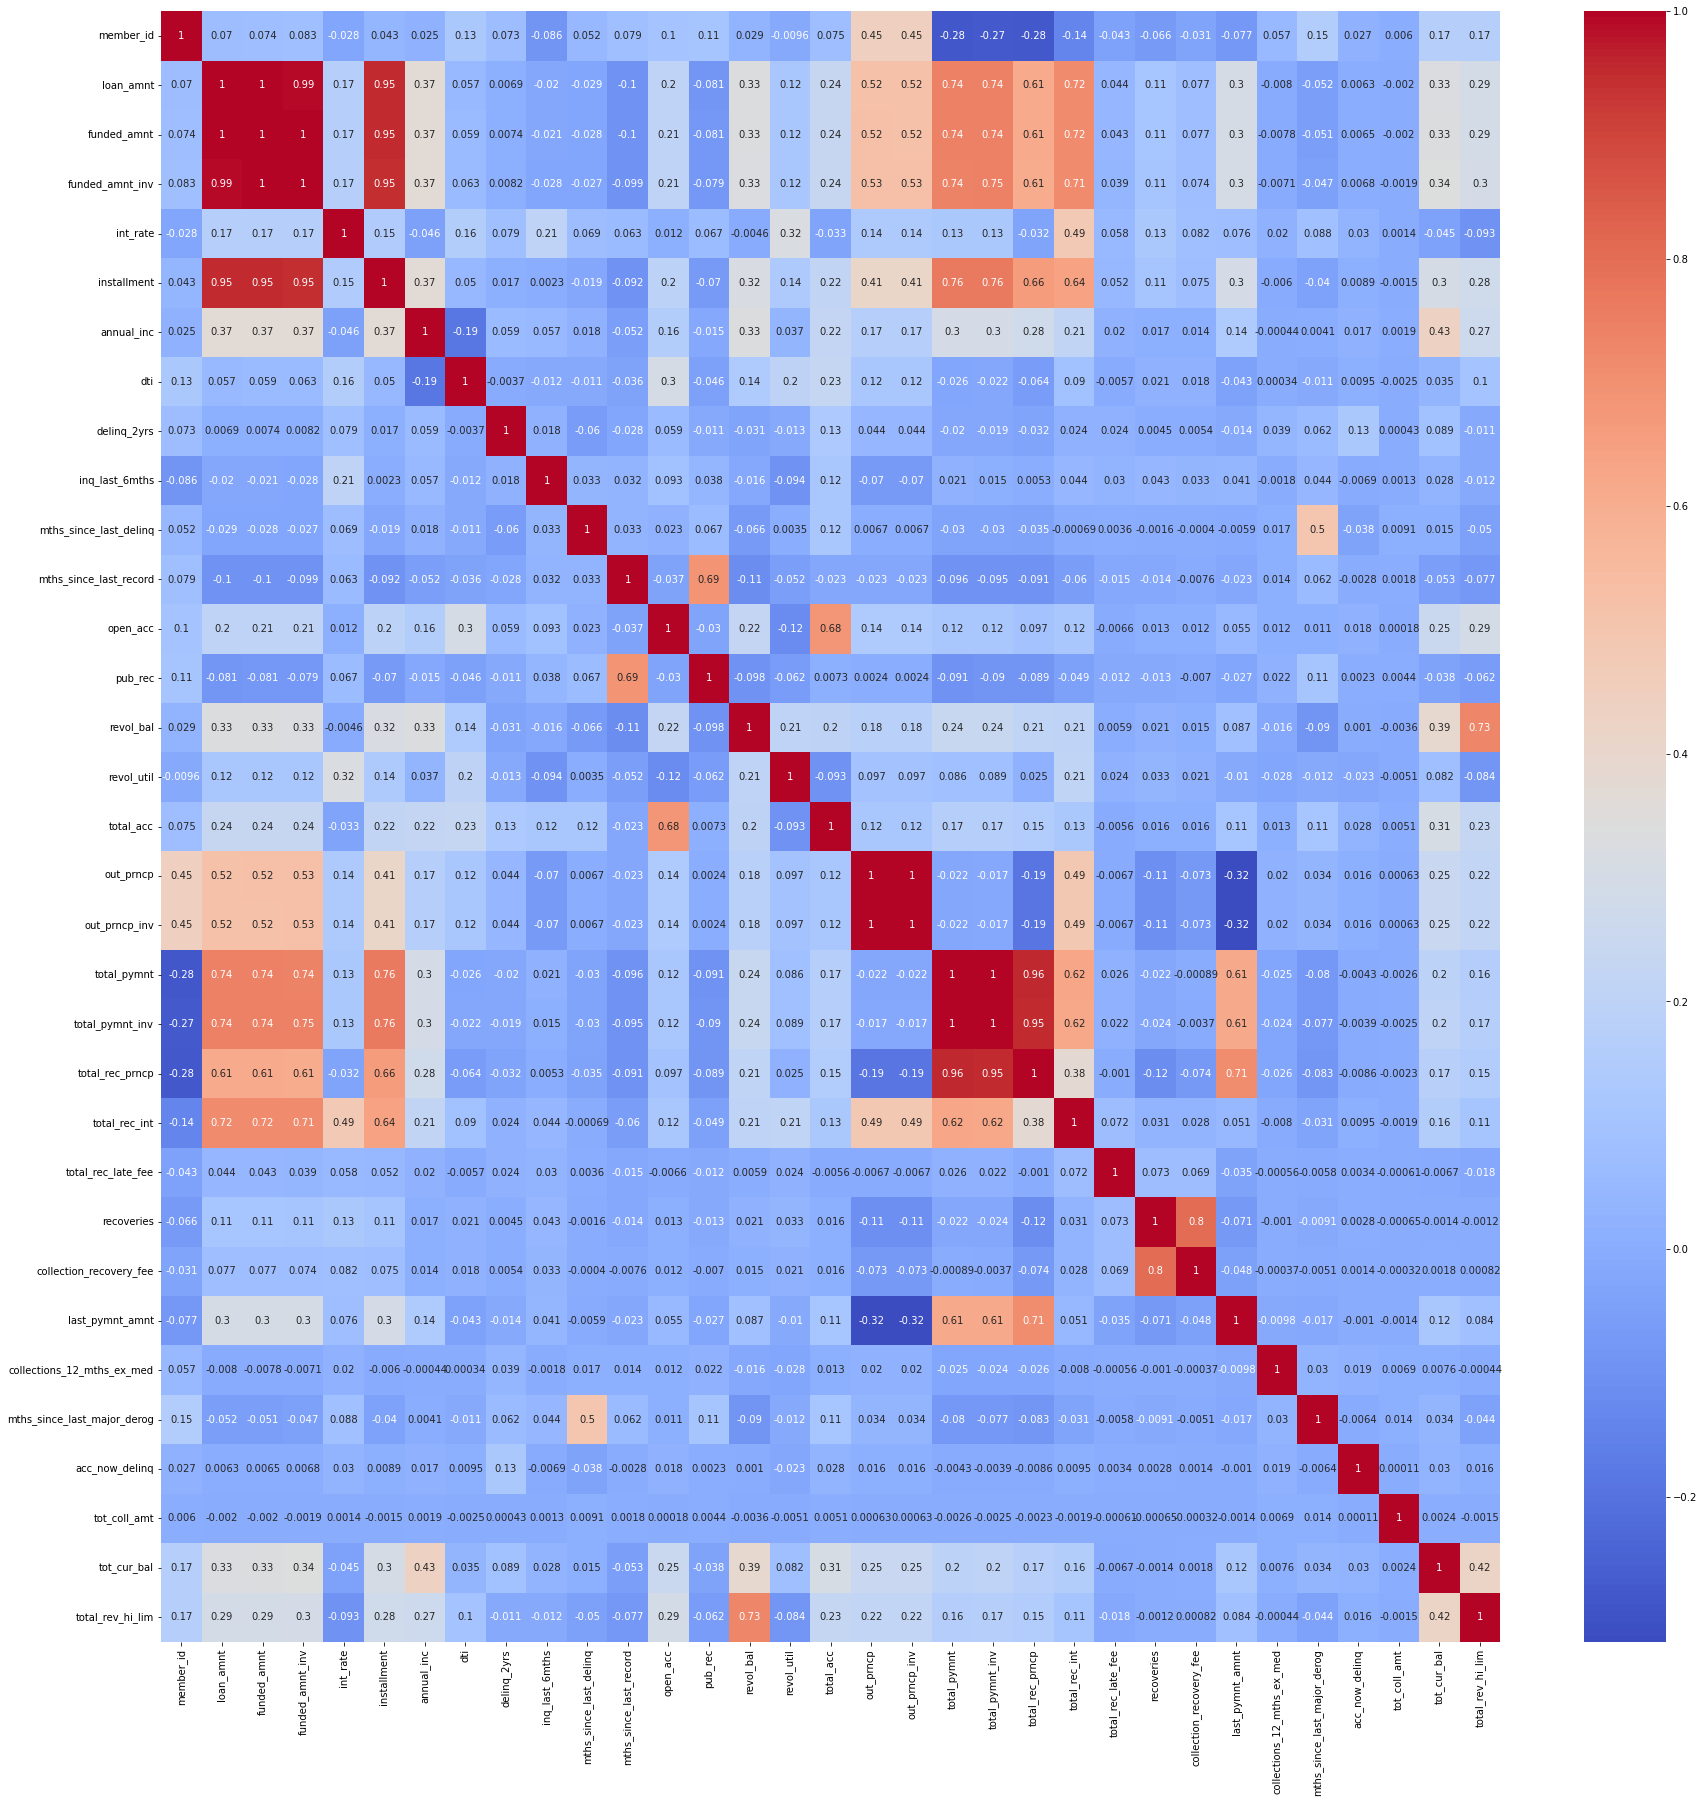

In [115]:
# create a map showing the correlation
fig = plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Model Building

####  feature as the target feature.
('issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d')

#### Encoding

In [269]:
# List of Column Object target feature
df.select_dtypes(include='object').columns.tolist()

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type']

In [271]:
df.drop(['emp_title',
 'url',
 'desc',
 'title',
 'zip_code',
 'addr_state',
 'application_type'], inplace=True, axis=1)

In [272]:
df.select_dtypes(include='object').columns.tolist()

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d']

In [273]:
# categories data
cat_1 = df[['home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status']]

# Create OneHotEncoder object
oho = OneHotEncoder(sparse=False)

# Fit and transform the data
df_encoded = pd.DataFrame(oho.fit_transform(cat_1))

# Get the names of the encoded features
df_encoded.columns = oho.get_feature_names_out(['home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status'])
concatenated_data = pd.concat([df_1, df_encoded], axis=1)
concatenated_data.sample()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
348753,23222321,7650,7650,7650.0,36 months,18.24,277.49,D,D5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [310]:
# Encoding variabel of column emp_length
concatenated_data['emp_length'].replace({'< 1 year':0, '1 year':1, '2 years':2,
                                           '3 years':3, '4 years':4, '5 years':5,
                                           '6 years':6, '7 years':7, '8 years':8, 
                                           '9 years':9, '10+ years':10},inplace=True)
concatenated_data

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
0,43078,171,171,4975.0,0,10.65,162.87,1,6,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,43911,71,71,2500.0,1,15.27,59.83,2,13,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,43887,67,67,2400.0,0,15.96,84.33,2,14,10,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,41623,371,371,10000.0,0,13.49,339.31,2,10,10,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,43790,91,91,3000.0,1,12.69,67.79,1,9,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,51795,707,707,18400.0,1,14.47,432.64,2,11,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
466281,226835,851,851,22000.0,1,19.97,582.50,3,19,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
466282,226103,799,799,20700.0,1,16.99,514.34,3,15,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
466283,226193,51,51,2000.0,0,7.90,62.59,0,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [311]:
# Label Encoding
# convert all non-numeric variables (ordinal) to numeric type
for column in concatenated_data.columns:
    if concatenated_data[column].dtype == np.number: continue
# perform encoding for each non-numeric variables
    concatenated_data[column] = LabelEncoder().fit_transform(concatenated_data[column])
concatenated_data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
0,43078,171,171,4975.0,0,10.65,162.87,1,6,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,43911,71,71,2500.0,1,15.27,59.83,2,13,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,43887,67,67,2400.0,0,15.96,84.33,2,14,10,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,41623,371,371,10000.0,0,13.49,339.31,2,10,10,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,43790,91,91,3000.0,1,12.69,67.79,1,9,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Feature Selection

In [312]:
corr = concatenated_data.corrwith(concatenated_data["loan_status"])
corr.reset_index(name='corr value').sort_values('corr value', ascending=False)

,index,corr value
11,loan_status,1.000000
22,out_prncp,0.608775
23,out_prncp_inv,0.608733
0,member_id,0.423114
64,initial_list_status_w,0.183997
...,...,...
26,total_rec_prncp,-0.153234
63,initial_list_status_f,-0.183997
30,collection_recovery_fee,-0.213981
31,last_pymnt_amnt,-0.295780


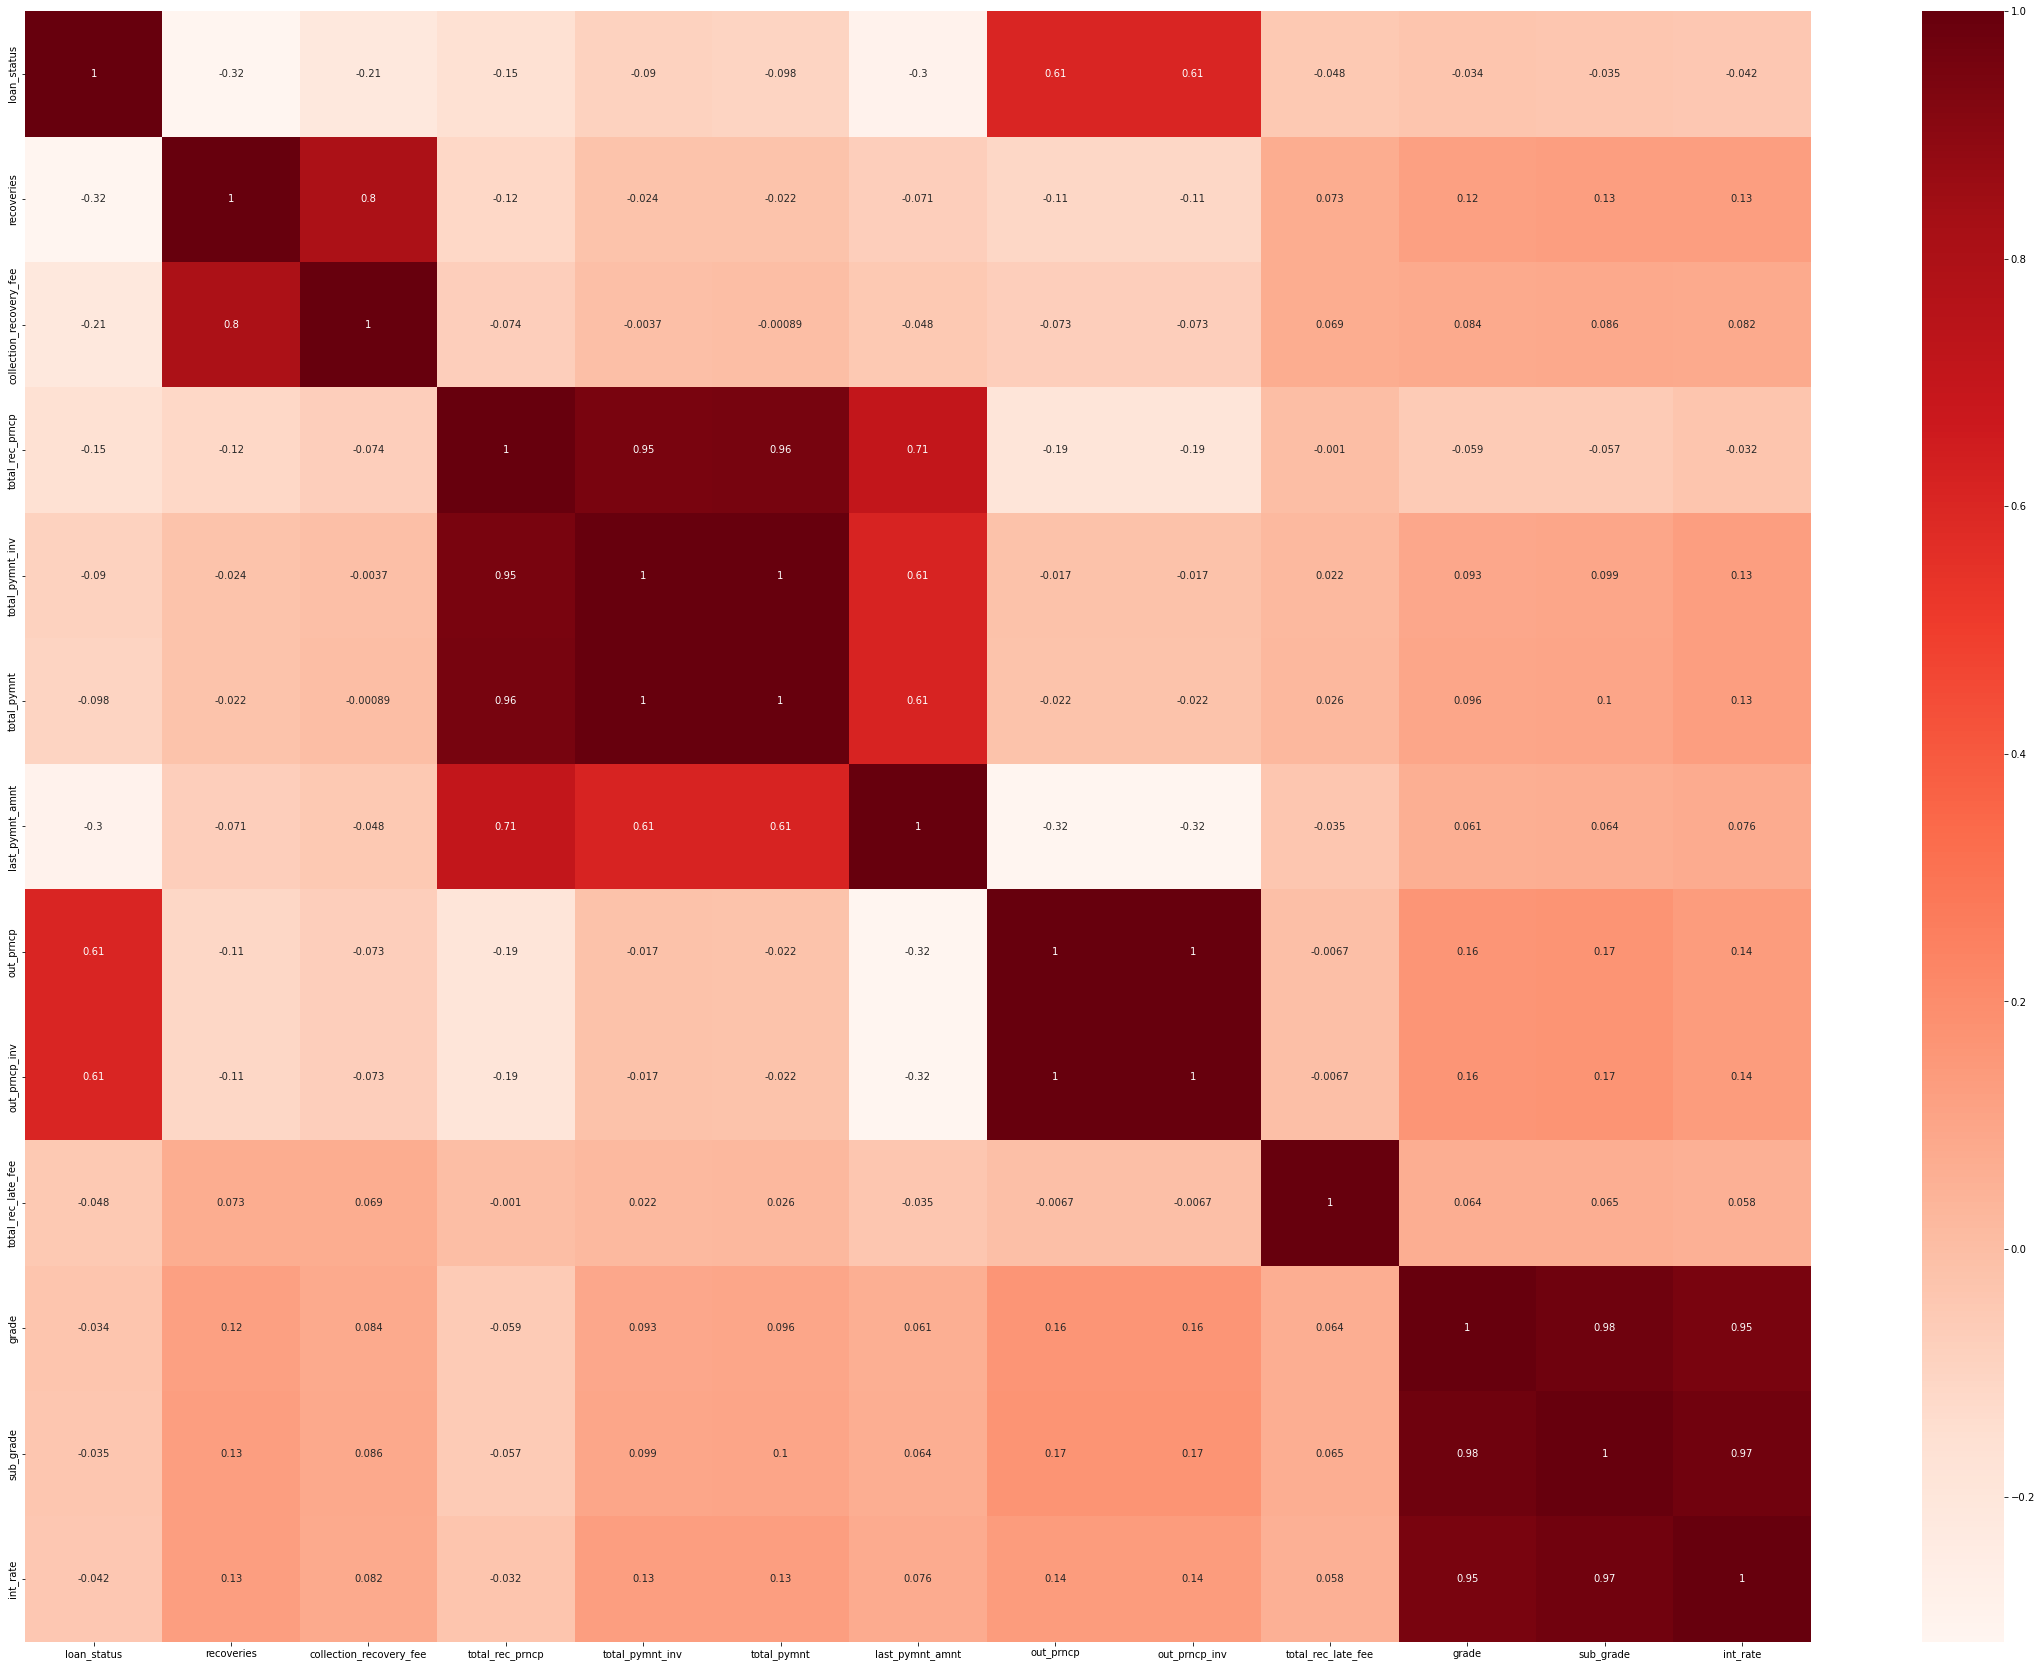

In [324]:
# let's only include the features mentioned above
fig = plt.figure(figsize = (40,30))
corr_data = concatenated_data[['loan_status', 'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 
                               'total_pymnt_inv', 'total_pymnt', 'last_pymnt_amnt', 'out_prncp', 'out_prncp_inv', 
                               'total_rec_late_fee', 'grade', 'sub_grade', 'int_rate']]
sns.heatmap(corr_data.corr(),cmap='Reds', annot = True);

 ### Logistic Regression

In [341]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create a logistic regression object
clf = LogisticRegression()

# train the model
log_model = LogisticRegression().fit(X_train, y_train)
print(log_model)

LogisticRegression()


In [342]:
# Define the target variable and features
X = corr_data.drop(['loan_status'], axis=1) #features
y = corr_data['loan_status'] #target

In [343]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (373028, 12)
Shape of X_test: (93257, 12)
Shape of y_train: (373028,)
Shape of y_test: (93257,)


In [344]:
# Fit the model using the training data
clf.fit(X_train, y_train)

LogisticRegression()

#### Performance of Testing Model

In [345]:
# Predict the class labels for the test data
y_pred = clf.predict(X_test)

In [352]:
# Print the confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

acc_clf_train=round(log_model.score(X_train,y_train)*100,2)
acc_clf_test=round(log_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_clf_train))
print("Test Accuracy: {} %".format(acc_clf_test))

Confusion Matrix:
 [[ 6831  2145   191     0]
 [  176 36730     0     0]
 [  103    41 44750     0]
 [   10     7  2273     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.75      0.84      9167
           1       0.94      1.00      0.97     36906
           2       0.95      1.00      0.97     44894
           3       0.00      0.00      0.00      2290

    accuracy                           0.95     93257
   macro avg       0.71      0.68      0.69     93257
weighted avg       0.92      0.95      0.93     93257

Training Accuracy: 94.73 %
Test Accuracy: 94.7 %


#### Performance of Training Model

In [355]:
# Predict the class labels for the test data
y_train = clf.predict(X_train)

In [361]:
# Print the confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 6831  2145   191     0]
 [  176 36730     0     0]
 [  103    41 44750     0]
 [   10     7  2273     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.75      0.84      9167
           1       0.94      1.00      0.97     36906
           2       0.95      1.00      0.97     44894
           3       0.00      0.00      0.00      2290

    accuracy                           0.95     93257
   macro avg       0.71      0.68      0.69     93257
weighted avg       0.92      0.95      0.93     93257



### Random Forest

In [380]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# predict data train
y_train_pred_rf = rf_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Random Forest):')
print(classification_report(y_train, y_train_pred_rf))


Classification Report Training Model (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        35

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



### XGBoost Classifier

In [383]:
# train the model
xgb_model = XGBClassifier().fit(X_train, y_train)
# predict data train
y_train_pred_xgb = xgb_model.predict(X_train)

# print classification report
print('Classification Report Training Model (XGBoost Classifier):')
print(classification_report(y_train, y_train_pred_xgb))

Classification Report Training Model (XGBoost Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        35

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



In [384]:
# predict data test
y_test_pred_xgb = xgb_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (XGBoost Classifier):')
print(classification_report(y_test, y_test_pred_xgb))


Classification Report Testing Model (XGBoost Classifier):
              precision    recall  f1-score   support

           0       0.55      0.65      0.59        17
           1       0.40      0.31      0.35        13

    accuracy                           0.50        30
   macro avg       0.48      0.48      0.47        30
weighted avg       0.49      0.50      0.49        30



### DecisionTreeClassifier

In [385]:
# train the model
dt_model = DecisionTreeClassifier().fit(X_train,y_train)
print(dt_model)

DecisionTreeClassifier()


In [386]:
# predict data train
y_train_pred_dt = dt_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree):')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Training Model (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        35

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



### K-Nearest Neighbors

In [389]:
from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbor

# train the model
knn_model = KNeighborsClassifier().fit(X_train,y_train)
print(knn_model)

KNeighborsClassifier()


In [390]:
# predict data train
y_train_pred_knn = knn_model.predict(X_train)

# print classification report
print('Classification Report Training Model (K-Nearest Neighbors):')
print(classification_report(y_train, y_train_pred_knn))

Classification Report Training Model (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       0.76      0.71      0.74        35
           1       0.73      0.77      0.75        35

    accuracy                           0.74        70
   macro avg       0.74      0.74      0.74        70
weighted avg       0.74      0.74      0.74        70



In [391]:
# predict data test
y_test_pred_knn = knn_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (K-Nearest Neighbors):')
print(classification_report(y_test, y_test_pred_knn))

Classification Report Testing Model (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       0.47      0.53      0.50        17
           1       0.27      0.23      0.25        13

    accuracy                           0.40        30
   macro avg       0.37      0.38      0.38        30
weighted avg       0.39      0.40      0.39        30

